In [1]:
# Display plots in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Common imports
import numpy as np
import pylab as pl
import geopandas as gp 
import pandas as pd

In [3]:
# Make plots prettyful
pl.style.use('fivethirtynine')

In [4]:
shp = gp.GeoDataFrame.from_file('../data/CensusTracts2010/CensusTracts2010.shp')

In [5]:
shp['county'] = shp['GEOID10'].str[:5]

In [6]:
counties = [
    '003', # Box Elder
    '057', # Weber
    '029', # Morgan
    '043', # Summit
    '045', # Tooele
    '011', # Davis
    '035', # Salt Lake
    '051', # Wasatch
    '049', # Utah
]

selector = shp['county'] == '49003'

for c in counties[1:]:
    selector |= shp['county'] == '49' + c

shp = shp[selector]

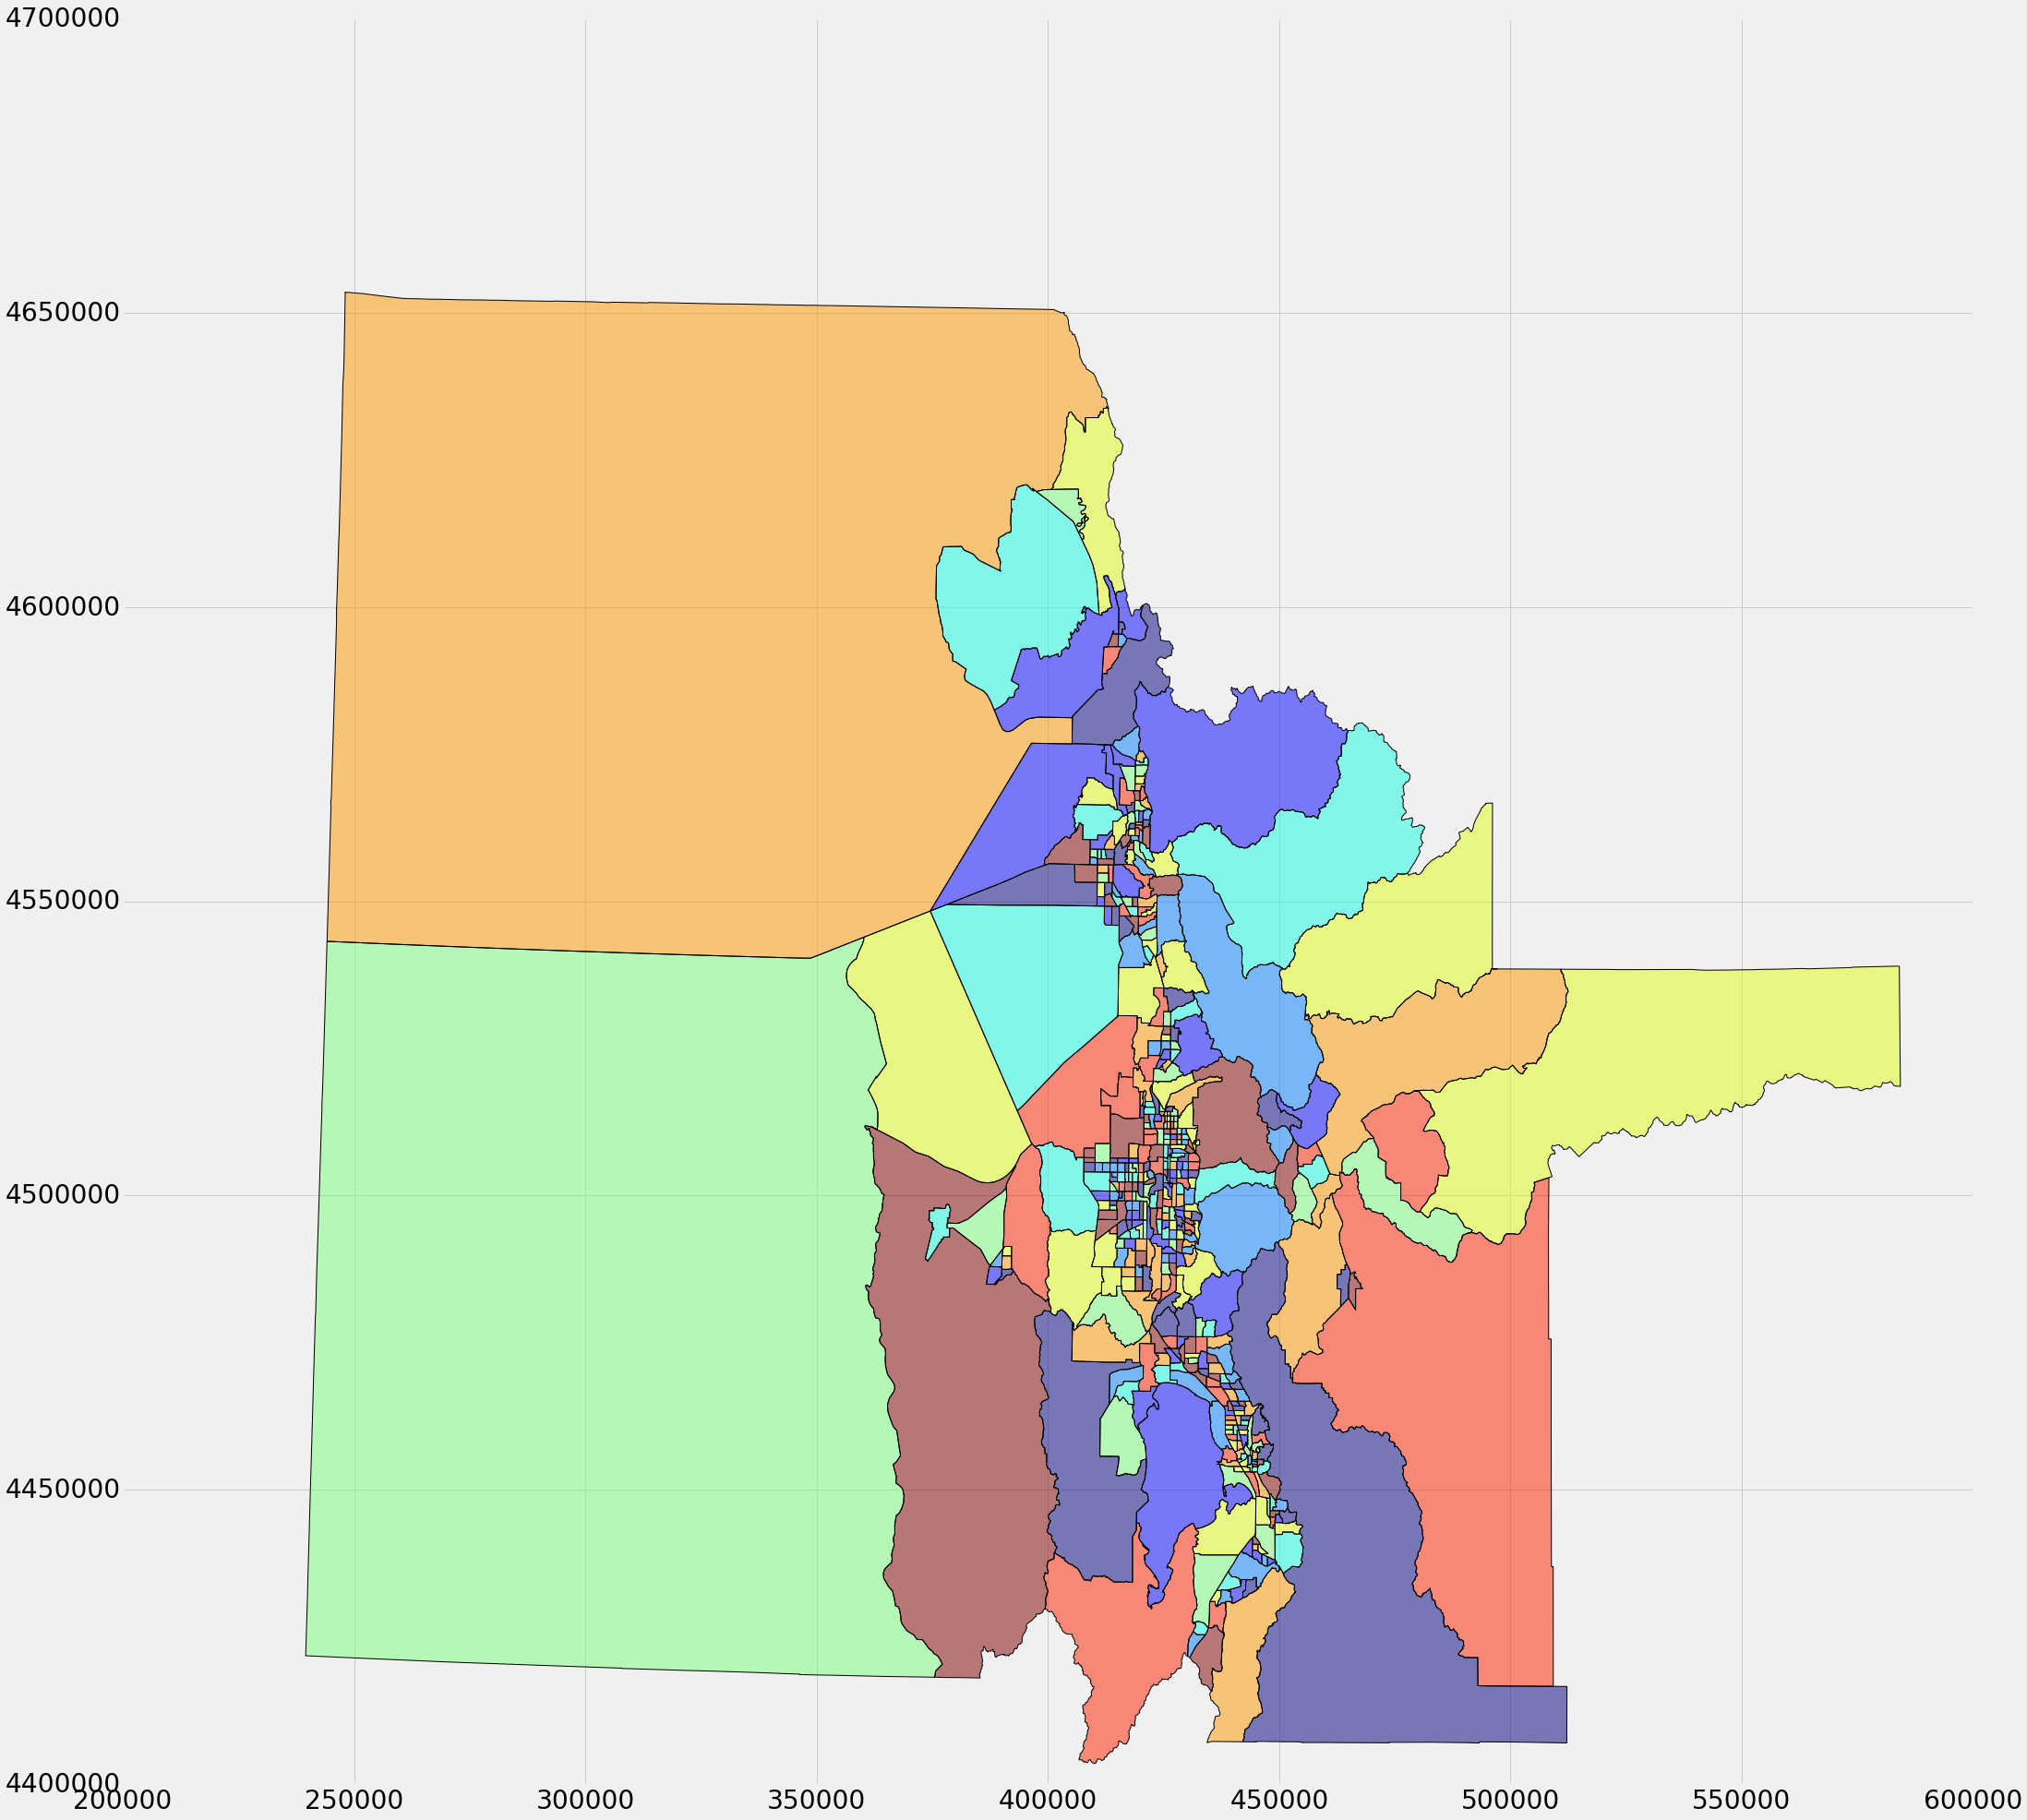

In [7]:
figure, ax = pl.subplots(figsize=(32,32))
shp.plot(axes=ax)

In [8]:
lodes = lodes = pd.read_csv('../data/ut_od_main_JT00_2014.csv', dtype={'w_geocode': str, 'h_geocode': str})

In [9]:
lodes['o_code'] = lodes['h_geocode'].str[:11]
lodes['d_code'] = lodes['w_geocode'].str[:11]
lodes['w_county'] = lodes['w_geocode'].str[2:5]
lodes['h_county'] = lodes['h_geocode'].str[2:5]

In [10]:
lodes = lodes[lodes['w_county'].str.contains('|'.join(counties))&lodes['h_county'].str.contains('|'.join(counties))]

In [11]:
lodes

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate,o_code,d_code,w_county,h_county
2367,490039601001001,490039604001149,1,0,1,0,0,1,0,0,0,1,20160219,49003960400,49003960100,003,003
2369,490039601001099,490039607013016,1,0,1,0,1,0,0,0,1,0,20160219,49003960701,49003960100,003,003
2370,490039601001116,490039602004133,1,0,1,0,0,1,0,1,0,0,20160219,49003960200,49003960100,003,003
2371,490039601001116,490039603002012,1,0,0,1,0,1,0,1,0,0,20160219,49003960300,49003960100,003,003
2372,490039601001116,490039603005028,1,0,1,0,0,1,0,1,0,0,20160219,49003960300,49003960100,003,003
2373,490039601001116,490351130072000,1,0,1,0,0,1,0,1,0,0,20160219,49035113007,49003960100,003,035
2374,490039601001122,490039601001225,1,0,1,0,1,0,0,0,1,0,20160219,49003960100,49003960100,003,003
2375,490039601001122,490039603006020,1,1,0,0,0,0,1,0,1,0,20160219,49003960300,49003960100,003,003
2377,490039601001122,490351048004004,1,1,0,0,0,0,1,0,1,0,20160219,49035104800,49003960100,003,035
2379,490039601001215,490039601001128,1,0,0,1,0,1,0,1,0,0,20160219,49003960100,49003960100,003,003


In [12]:
grouped = lodes.groupby(['o_code', 'd_code'])
tract_commutes = grouped.sum().reset_index()

In [13]:
tract_commutes

,o_code,d_code,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate
0,49003960100,49003960100,139,26,83,30,54,27,58,82,24,33,2499867156
1,49003960100,49003960200,70,17,36,17,24,18,28,35,15,20,1370894892
2,49003960100,49003960300,198,56,103,39,75,71,52,65,42,91,3467557668
3,49003960100,49003960400,86,7,45,34,4,15,67,62,18,6,1532176644
4,49003960100,49003960500,59,6,39,14,13,11,35,23,11,25,1149132483
5,49003960100,49003960601,28,10,15,3,5,12,11,25,0,3,524165694
6,49003960100,49003960602,8,1,5,2,2,4,2,5,0,3,161281752
7,49003960100,49003960701,20,3,5,12,12,5,3,0,1,19,362883942
8,49003960100,49003960702,13,0,9,4,9,2,2,0,0,13,262082847
9,49003960100,49003960801,6,2,3,1,5,0,1,2,2,2,120961314


c:\Users\Jeremy\Anaconda\lib\site-packages\IPython\kernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\Users\Jeremy\Anaconda\lib\site-packages\IPython\kernel\__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


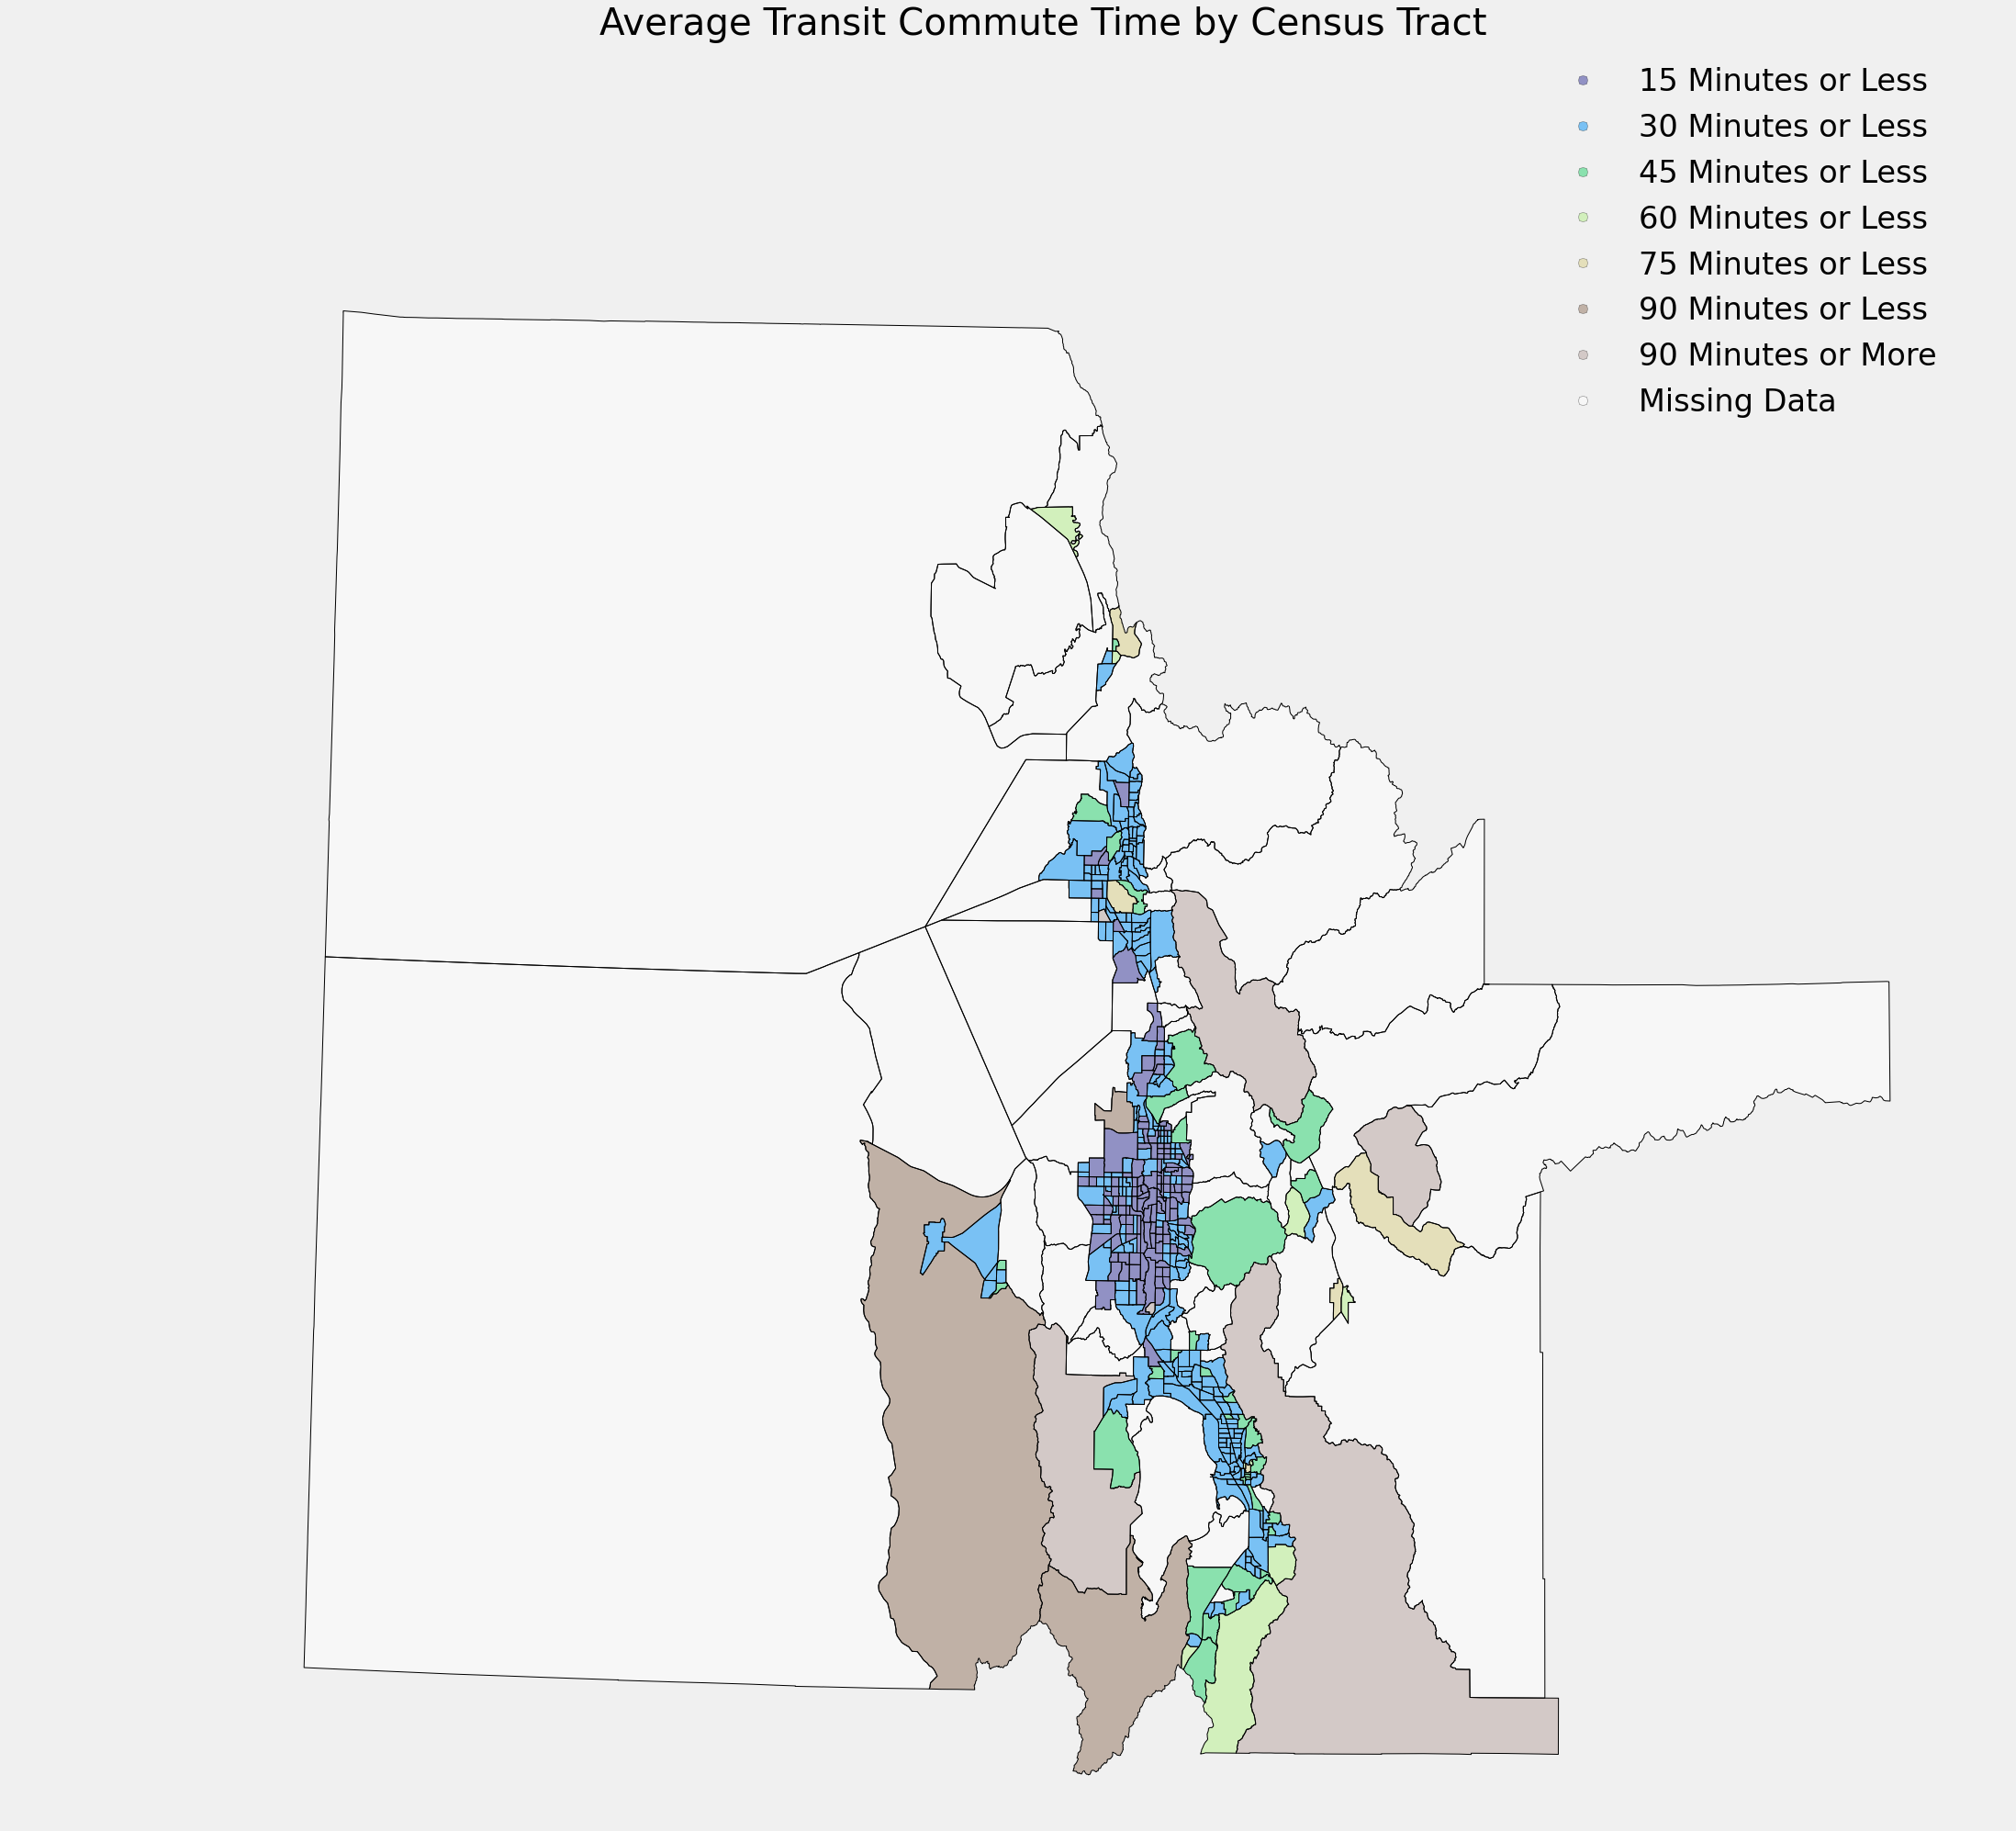

In [31]:
times = pd.read_csv('../data/transit_time_matrix.csv', dtype={'o_code': str, 'd_code': str})
joined = tract_commutes.merge(times, on=('o_code', 'd_code'))
joined['total_commute_time'] = joined['travel_seconds'] * joined['S000']
joined['total_walk_dist'] = joined['walk_dist'] * joined['S000']

h_tracts = joined.groupby('o_code')

sums = h_tracts.sum()

summary = pd.DataFrame({
    'o_code': sums.index,
    'average_commute_time': sums['travel_seconds']/sums['S000'],
    'average_walk_distance': sums['walk_dist']/sums['S000'],
    'number_of_commuters': sums['S000']
})

shp2 = shp.merge(summary, left_on='GEOID10', right_on='o_code', how='left')
shp2['time_rank'] = '90 Minutes or More'
shp2['time_rank'][np.isnan(shp2['average_commute_time'])] = "Missing Data"
for i in [90, 75, 60, 45, 30, 15]:
    shp2['time_rank'][shp2['average_commute_time'] < (60*i)] = '%s Minutes or Less' % i
    
figure, ax = pl.subplots(figsize=(32,32))
ax.axis('off')
shp2.plot(axes=ax, column='time_rank', legend=True, categorical=True, colormap='terrain')
ax.set_title('Average Transit Commute Time by Census Tract')

c:\Users\Jeremy\Anaconda\lib\site-packages\IPython\kernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\Users\Jeremy\Anaconda\lib\site-packages\IPython\kernel\__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


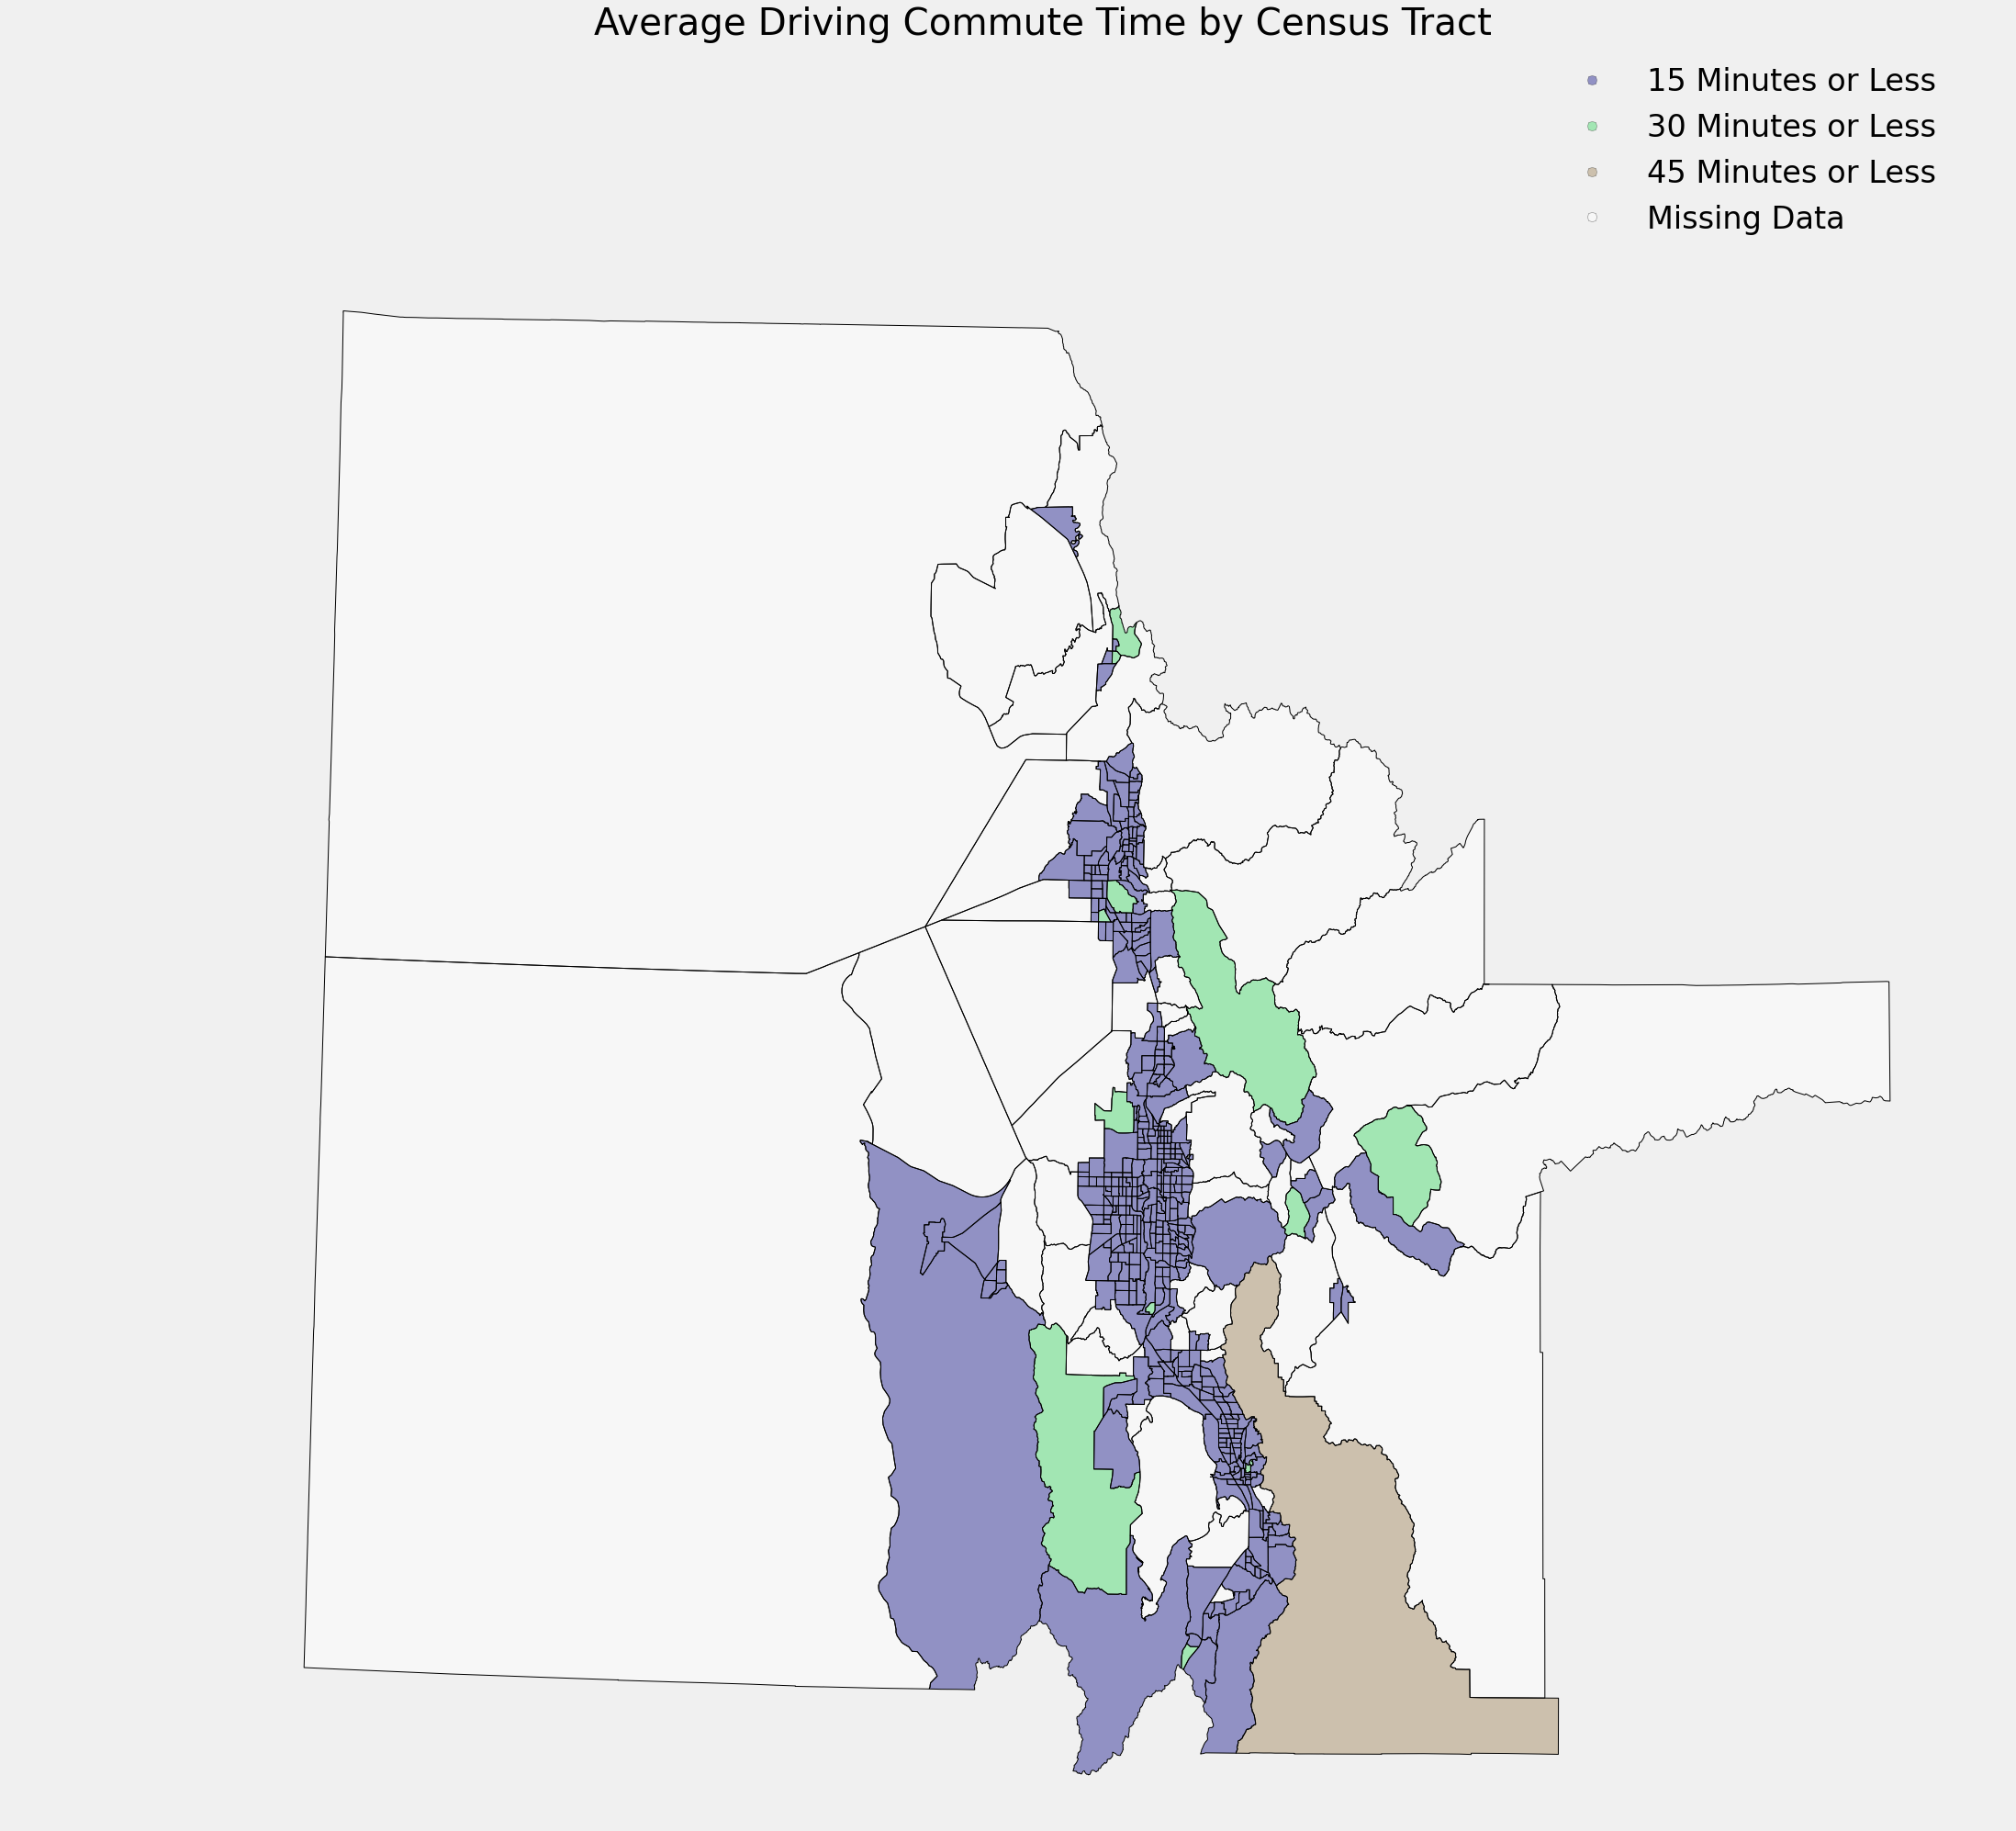

In [30]:
times = pd.read_csv('../data/drive_time_matrix.csv', dtype={'o_code': str, 'd_code': str})
joined = tract_commutes.merge(times, on=('o_code', 'd_code'))
joined['total_commute_time'] = joined['travel_seconds'] * joined['S000']
joined['total_walk_dist'] = joined['walk_dist'] * joined['S000']

h_tracts = joined.groupby('o_code')

sums = h_tracts.sum()

summary = pd.DataFrame({
    'o_code': sums.index,
    'average_commute_time': sums['travel_seconds']/sums['S000'],
    'average_walk_distance': sums['walk_dist']/sums['S000'],
    'number_of_commuters': sums['S000']
})

shp2 = shp.merge(summary, left_on='GEOID10', right_on='o_code', how='left')
shp2['time_rank'] = '90 Minutes or More'
shp2['time_rank'][np.isnan(shp2['average_commute_time'])] = "Missing Data"
for i in [90, 75, 60, 45, 30, 15]:
    shp2['time_rank'][shp2['average_commute_time'] < (60*i)] = '%s Minutes or Less' % i
    
figure, ax = pl.subplots(figsize=(32,32))
ax.axis('off')
shp2.plot(axes=ax, column='time_rank', legend=True, categorical=True, colormap='terrain')
ax.set_title('Average Driving Commute Time by Census Tract')

c:\Users\Jeremy\Anaconda\lib\site-packages\IPython\kernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\Users\Jeremy\Anaconda\lib\site-packages\IPython\kernel\__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


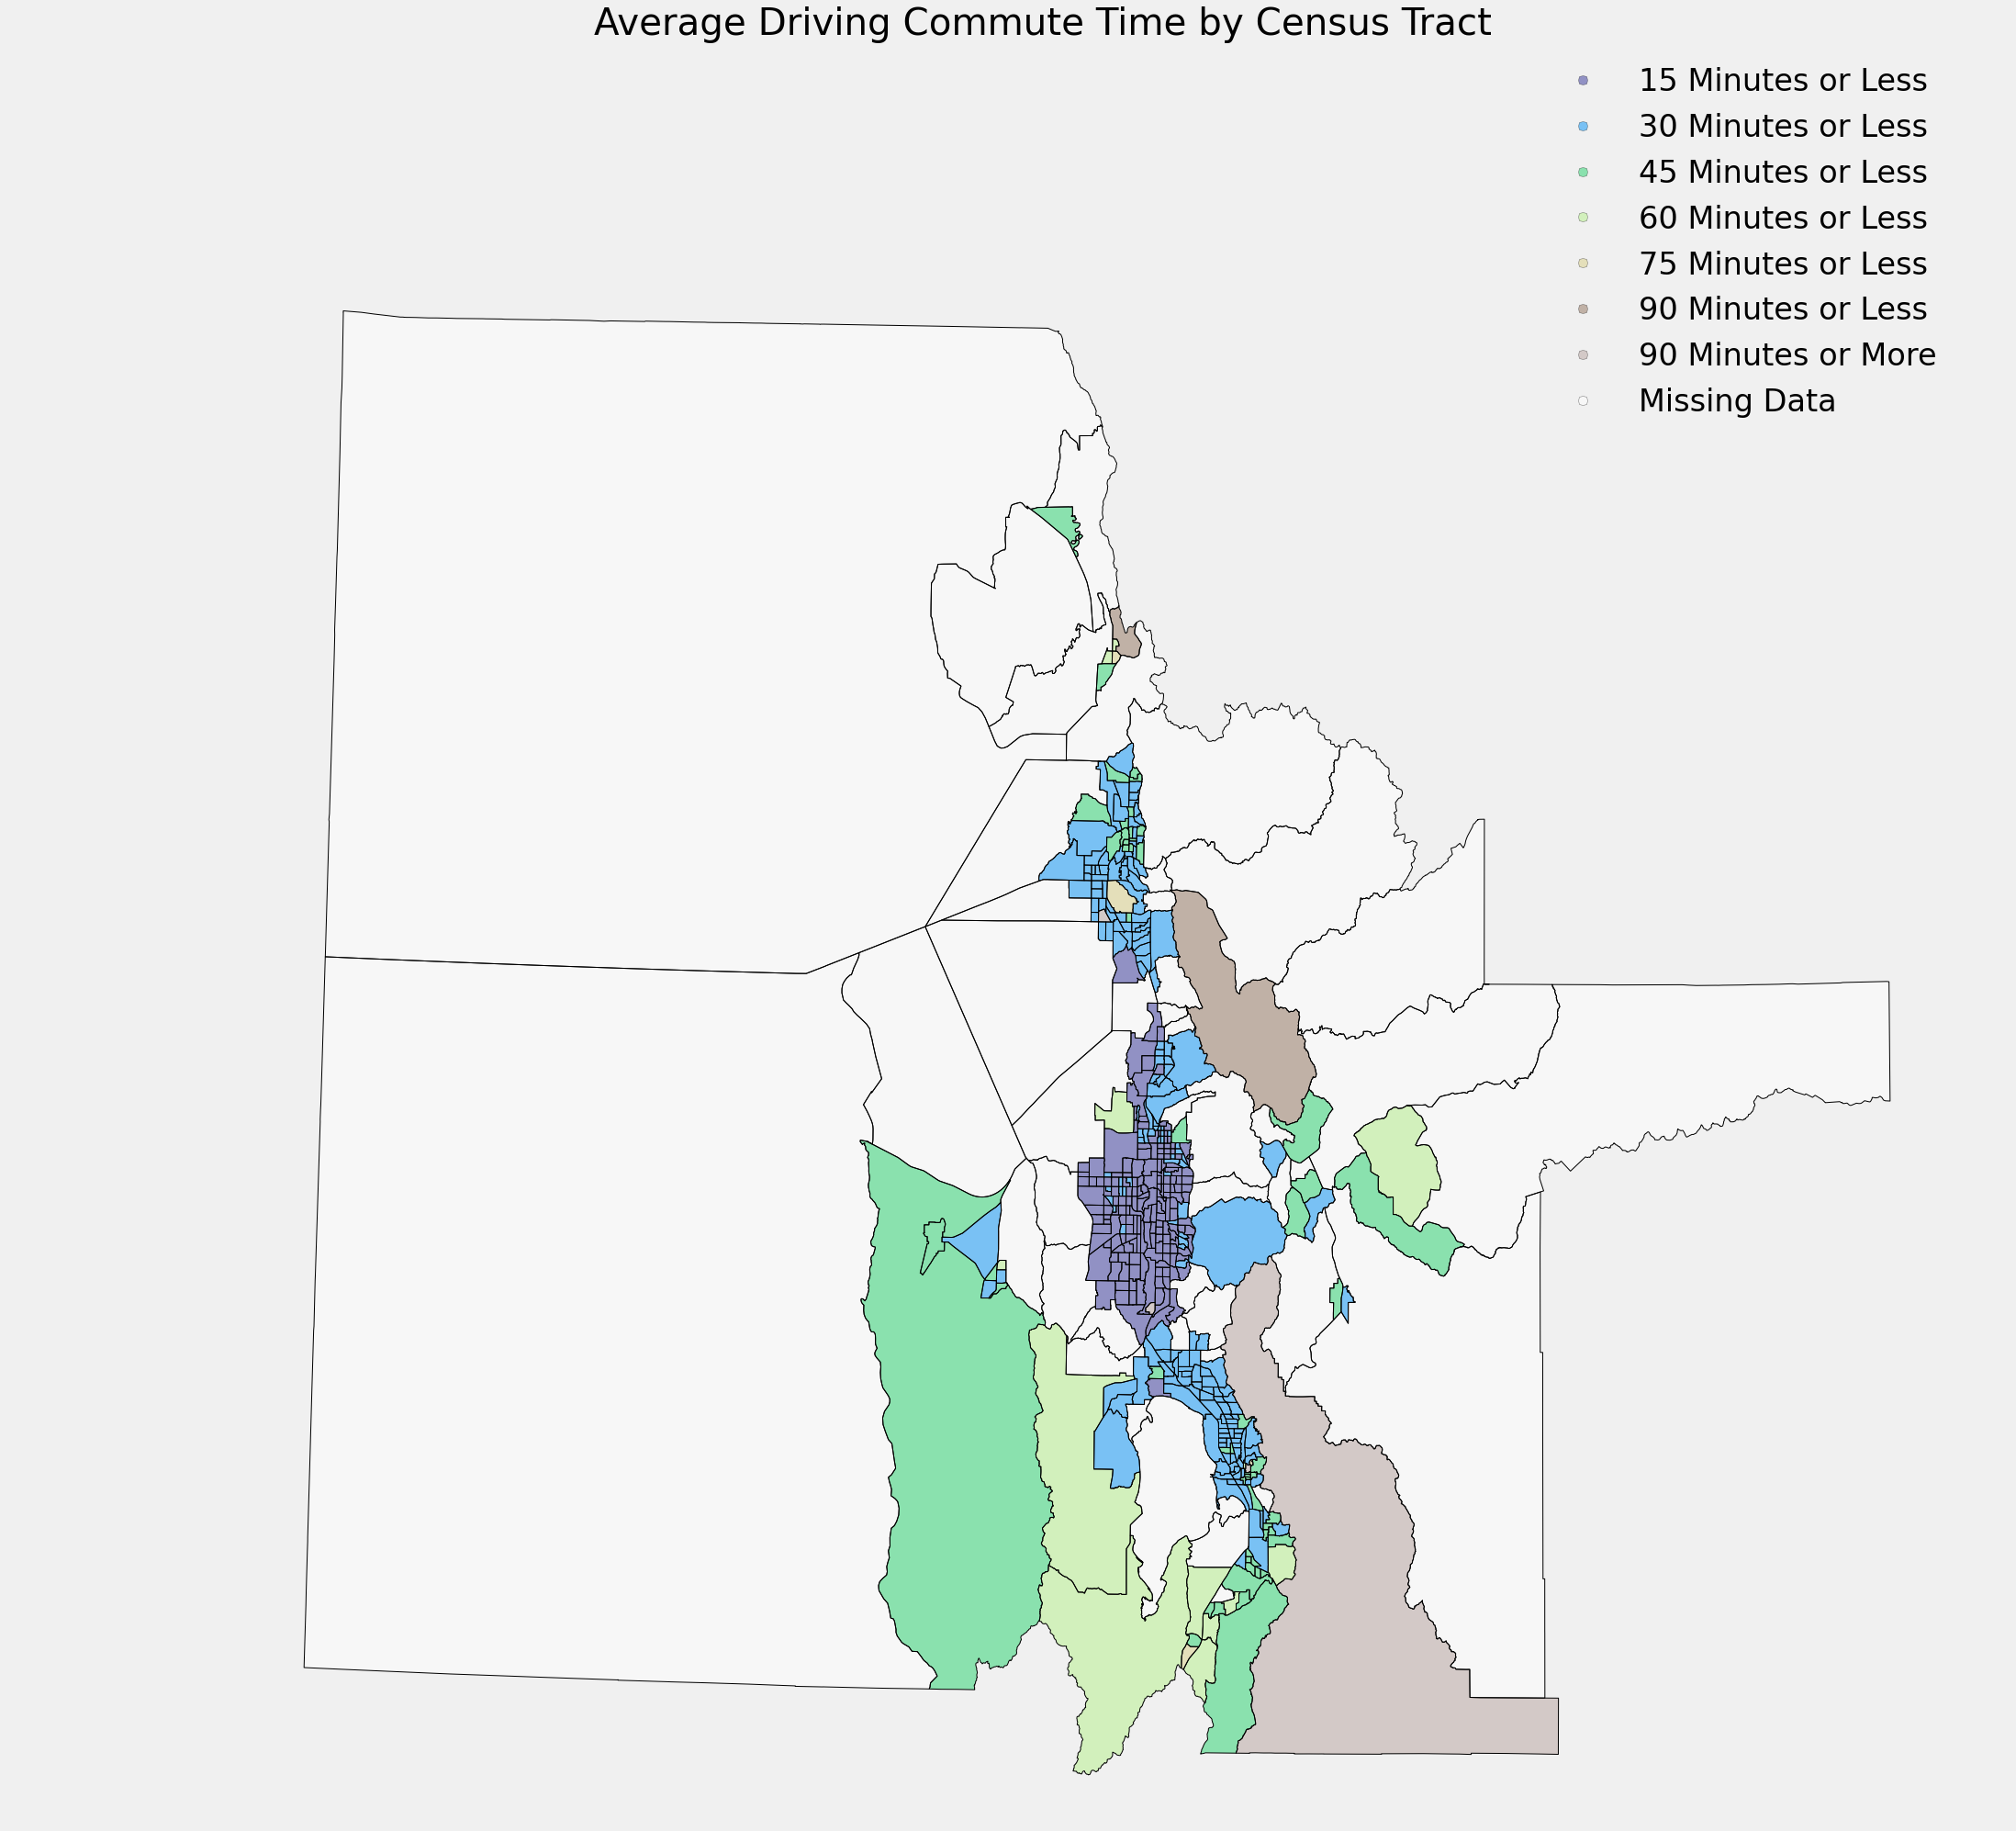

In [29]:
times = pd.read_csv('../data/bike_time_matrix.csv', dtype={'o_code': str, 'd_code': str})
joined = tract_commutes.merge(times, on=('o_code', 'd_code'))
joined['total_commute_time'] = joined['travel_seconds'] * joined['S000']
joined['total_walk_dist'] = joined['walk_dist'] * joined['S000']

h_tracts = joined.groupby('o_code')

sums = h_tracts.sum()

summary = pd.DataFrame({
    'o_code': sums.index,
    'average_commute_time': sums['travel_seconds']/sums['S000'],
    'average_walk_distance': sums['walk_dist']/sums['S000'],
    'number_of_commuters': sums['S000']
})

shp2 = shp.merge(summary, left_on='GEOID10', right_on='o_code', how='left')
shp2['time_rank'] = '90 Minutes or More'
shp2['time_rank'][np.isnan(shp2['average_commute_time'])] = "Missing Data"
for i in [90, 75, 60, 45, 30, 15]:
    shp2['time_rank'][shp2['average_commute_time'] < (60*i)] = '%s Minutes or Less' % i
    
figure, ax = pl.subplots(figsize=(32,32))
ax.axis('off')
shp2.plot(axes=ax, column='time_rank', legend=True, categorical=True, colormap='terrain')
ax.set_title('Average Driving Commute Time by Census Tract')

In [18]:
times.travel_seconds.min()

0L

In [19]:
joined

,o_code,d_code,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate,walk_dist,travel_seconds,total_commute_time,total_walk_dist
0,49003960300,49003960300,989,309,522,158,420,358,211,271,270,448,14374236147,472.000000,354,350106,466808.000000
1,49003960300,49003960601,81,25,46,10,11,41,29,63,1,17,1270093797,26659.730211,20921,1694601,2159438.147052
2,49003960300,49003960602,15,3,12,0,8,4,3,2,3,10,282243066,NaN,24893,373395,NaN
3,49003960300,49003960701,72,21,32,19,39,20,13,3,1,68,1370894892,26545.821519,21393,1540296,1911299.149353
4,49003960300,49003960702,17,8,7,2,5,6,6,0,3,14,342723723,26901.591474,21371,363307,457327.055052
5,49003960300,49003960802,57,22,28,7,33,15,9,7,9,41,1088651826,26707.580737,21818,1243626,1522332.101999
6,49003960300,49011125200,1,0,1,0,0,0,1,0,0,1,20160219,28264.628707,32807,32807,28264.628707
7,49003960300,49011125304,1,0,0,1,0,1,0,0,1,0,20160219,27306.263895,27980,27980,27306.263895
8,49003960300,49011125305,1,0,1,0,1,0,0,0,0,1,20160219,26641.491872,27569,27569,26641.491872
9,49003960300,49011125405,3,1,2,0,0,2,1,2,0,1,60480657,27911.793383,29327,87981,83735.380150


In [20]:
sums

,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate,walk_dist,travel_seconds,total_commute_time,total_walk_dist
o_code,,,,,,,,,,,,,,,
49003960300,2382,718,1295,369,805,907,670,638,553,1191,40985725227,6384935.636110,7599765,40583969,38421701.166479
49003960601,1363,377,711,275,429,554,380,321,279,763,26107483605,532162.517578,2523642,10895679,3558131.066416
49003960602,942,249,496,197,274,338,330,188,242,512,17660351844,1794904.259839,3917504,13389700,8350025.665144
49003960701,1611,484,846,281,514,662,435,410,295,906,30038726310,575931.876157,2583779,11373151,4162559.098985
49003960702,1008,309,543,156,344,422,242,237,221,550,18990926298,581028.554698,2770178,8032558,2775645.852252
49003960802,1714,394,1034,286,499,518,697,345,311,1058,32498273028,592642.663773,2498145,11580768,3930405.969023
49011125102,1551,390,778,383,464,446,641,180,362,1009,29837124120,1498578.301916,2667944,12645130,8057546.438194
49011125103,1658,459,971,228,430,577,651,280,314,1064,30885455508,1565494.335779,3077645,16748189,10646139.112160
49011125200,468,198,245,25,160,163,145,39,105,324,8588253294,689820.845802,1873332,4095914,1555089.012235


In [22]:
tract_commutes

,o_code,d_code,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate
0,49003960100,49003960100,139,26,83,30,54,27,58,82,24,33,2499867156
1,49003960100,49003960200,70,17,36,17,24,18,28,35,15,20,1370894892
2,49003960100,49003960300,198,56,103,39,75,71,52,65,42,91,3467557668
3,49003960100,49003960400,86,7,45,34,4,15,67,62,18,6,1532176644
4,49003960100,49003960500,59,6,39,14,13,11,35,23,11,25,1149132483
5,49003960100,49003960601,28,10,15,3,5,12,11,25,0,3,524165694
6,49003960100,49003960602,8,1,5,2,2,4,2,5,0,3,161281752
7,49003960100,49003960701,20,3,5,12,12,5,3,0,1,19,362883942
8,49003960100,49003960702,13,0,9,4,9,2,2,0,0,13,262082847
9,49003960100,49003960801,6,2,3,1,5,0,1,2,2,2,120961314


In [26]:
times[times['o_code'] == '49003960100']

,o_code,d_code,walk_dist,travel_seconds
